# Imports

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import keras
from keras.optimizers import Adadelta
import matplotlib.pyplot as plt
from pathlib import Path

Using TensorFlow backend.


## Import Data

In [2]:
data_train = pd.read_csv('../data/trump/train_rounds_filtered_merged.csv', header=None)
data_test = pd.read_csv('../data/trump/test_rounds_filtered_merged.csv', header=None)

cards = [
# Diamonds
'DA','DK','DQ','DJ','D10','D9','D8','D7','D6',
# Hearts
'HA','HK','HQ','HJ','H10','H9','H8','H7','H6',
# Spades
'SA','SK','SQ','SJ','S10','S9','S8','S7','S6',
# Clubs
'CA','CK','CQ','CJ','C10','C9','C8','C7','C6'
]

trump = ['trump']

In [3]:
# data_train
data_train.columns = cards + trump
data_train.head()

,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,...,CA,CK,CQ,CJ,C10,C9,C8,C7,C6,trump
0,0,1,0,0,1,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,3
1,0,0,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,6
3,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,6
4,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,1,0,0,1,0,3


In [4]:
# data_test
data_test.columns = cards + trump
data_test.head()

,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,...,CA,CK,CQ,CJ,C10,C9,C8,C7,C6,trump
0,0,0,1,1,0,0,1,0,0,1,...,0,0,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,1,0,0,0,1,6
2,0,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,1,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0


add data column with NrD, NrH, NrS, NrC, NrA, Nr6

In [5]:
# data_train
#data_train.insert(loc=len(data_train.columns), column='NrD', value=data_train.iloc[:,0:9].sum(axis=1) / 9.0)
#data_train.insert(loc=len(data_train.columns), column='NrH', value=data_train.iloc[:,9:18].sum(axis=1) / 9.0)
#data_train.insert(loc=len(data_train.columns), column='NrS', value=data_train.iloc[:,18:27].sum(axis=1) / 9.0)
#data_train.insert(loc=len(data_train.columns), column='NrC', value=data_train.iloc[:,27:36].sum(axis=1) / 9.0)

#data_train.insert(loc=len(data_train.columns), column='NrA', value=data_train.iloc[:,0:36:9].sum(axis=1) / 4.0)
#data_train.insert(loc=len(data_train.columns), column='Nr6', value=data_train.iloc[:,8:36:9].sum(axis=1) / 4.0)
data_train.head()

,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,...,CA,CK,CQ,CJ,C10,C9,C8,C7,C6,trump
0,0,1,0,0,1,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,3
1,0,0,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,6
3,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,6
4,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,1,0,0,1,0,3


In [6]:
# data_test
#data_test.insert(loc=len(data_test.columns), column='NrD', value=data_test.iloc[:,0:9].sum(axis=1) / 9.0)
#data_test.insert(loc=len(data_test.columns), column='NrH', value=data_test.iloc[:,9:18].sum(axis=1) / 9.0)
#data_test.insert(loc=len(data_test.columns), column='NrS', value=data_test.iloc[:,18:27].sum(axis=1) / 9.0)
#data_test.insert(loc=len(data_test.columns), column='NrC', value=data_test.iloc[:,27:36].sum(axis=1) / 9.0)

#data_test.insert(loc=len(data_test.columns), column='NrA', value=data_test.iloc[:,0:36:9].sum(axis=1) / 4.0)
#data_test.insert(loc=len(data_test.columns), column='Nr6', value=data_test.iloc[:,8:36:9].sum(axis=1) / 4.0)
data_test.head()

,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,...,CA,CK,CQ,CJ,C10,C9,C8,C7,C6,trump
0,0,0,1,1,0,0,1,0,0,1,...,0,0,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,1,0,0,0,1,6
2,0,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,1,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0


In [7]:
# x_train = data_train.filter(items=['DJ', 'D9', 'HJ', 'H9', 'SJ', 'S9', 'CJ', 'C9', 'NrD', 'NrH', 'NrS', 'NrC', 'NrA', 'Nr6']) 
x_train = data_train.drop('trump', axis='columns', inplace=False)
# x_train = data_train
x_train.head()

,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,...,S6,CA,CK,CQ,CJ,C10,C9,C8,C7,C6
0,0,1,0,0,1,0,0,0,0,0,...,1,1,0,0,1,0,1,0,0,0
1,0,0,1,0,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1
3,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,1,0,1,0,1,1,0,0,1,0


In [8]:
# x_test = data_test.filter(items=['DJ', 'D9', 'HJ', 'H9', 'SJ', 'S9', 'CJ', 'C9', 'NrD', 'NrH', 'NrS', 'NrC', 'NrA', 'Nr6']) 
x_test = data_test.drop('trump', axis='columns', inplace=False)
# x_test = data_test
x_test.head()

,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,...,S6,CA,CK,CQ,CJ,C10,C9,C8,C7,C6
0,0,0,1,1,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,0,0,0,1,1,...,1,0,0,0,0,1,0,0,0,1
2,0,0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1


In [9]:
#V2
y_train_label = data_train['trump']
y_train = keras.utils.to_categorical(y_train_label, num_classes=7)

model = keras.Sequential()
model.add(keras.layers.Dense(36, activation='relu', input_shape=[36]))
model.add(keras.layers.Dense(22, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='sgd', #'rmsprop', 'sgd', Adadelta()
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=100, batch_size=300, shuffle=True)

Epoch 1/100
140618/140618 [==============================] - 2s 14us/step - loss: 1.8257 - accuracy: 0.3374
Epoch 2/100
140618/140618 [==============================] - 2s 12us/step - loss: 1.7246 - accuracy: 0.3712
Epoch 3/100
140618/140618 [==============================] - 1s 10us/step - loss: 1.6223 - accuracy: 0.3890
Epoch 4/100
140618/140618 [==============================] - 1s 10us/step - loss: 1.4902 - accuracy: 0.4319
Epoch 5/100
140618/140618 [==============================] - 1s 10us/step - loss: 1.3571 - accuracy: 0.4777
Epoch 6/100
140618/140618 [==============================] - 1s 10us/step - loss: 1.2434 - accuracy: 0.5205
Epoch 7/100
140618/140618 [==============================] - 1s 10us/step - loss: 1.1559 - accuracy: 0.5455
Epoch 8/100
140618/140618 [==============================] - 2s 13us/step - loss: 1.0864 - accuracy: 0.5680
Epoch 9/100
140618/140618 [==============================] - 1s 10us/step - loss: 1.0373 - accuracy: 0.5854
Epoch 10/100
140618/140618 [

140618/140618 [==============================] - 1s 8us/step - loss: 0.8943 - accuracy: 0.6269
Epoch 77/100
140618/140618 [==============================] - 1s 8us/step - loss: 0.8940 - accuracy: 0.6274
Epoch 78/100
140618/140618 [==============================] - 1s 8us/step - loss: 0.8935 - accuracy: 0.6281
Epoch 79/100
140618/140618 [==============================] - 1s 8us/step - loss: 0.8931 - accuracy: 0.6285
Epoch 80/100
140618/140618 [==============================] - 1s 7us/step - loss: 0.8926 - accuracy: 0.6279
Epoch 81/100
140618/140618 [==============================] - 1s 8us/step - loss: 0.8920 - accuracy: 0.6287
Epoch 82/100
140618/140618 [==============================] - 1s 8us/step - loss: 0.8917 - accuracy: 0.6281
Epoch 83/100
140618/140618 [==============================] - 1s 8us/step - loss: 0.8912 - accuracy: 0.6286
Epoch 84/100
140618/140618 [==============================] - 1s 7us/step - loss: 0.8906 - accuracy: 0.6285
Epoch 85/100
140618/140618 [=============

In [10]:
model.summary()
print(model.get_weights())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 36)                1332      
_________________________________________________________________
dense_2 (Dense)              (None, 22)                814       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                368       
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 119       
Total params: 2,633
Trainable params: 2,633
Non-trainable params: 0
_________________________________________________________________
[array([[ 0.12649949,  0.09290654, -0.24263437, ...,  0.08392572,
         0.27074426, -0.14621036],
       [ 0.09430469,  0.01231327, -0.31209528, ..., -0.02114018,
         0.07448699,  0.14100552],
       [ 0.16840851, -0.1523974 , -0.32896695, ..

Text(0, 0.5, 'loss')

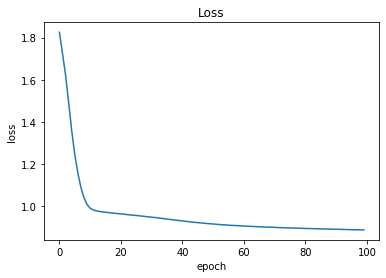

In [11]:
plt.plot(history.history['loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')

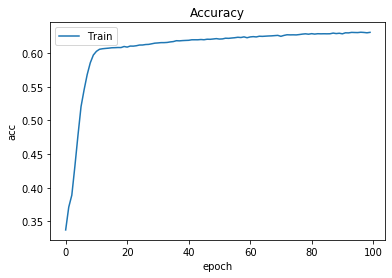

In [12]:
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['Train', 'Val'], loc='upper left')

In [13]:
history.history['accuracy'][-1]

0.63068026

# Predict

In [14]:
y_pred = model.predict(x_test)
# print(y_pred)

In [15]:
TOTAL_COUNT = len(x_test)
CORRECT_COUNT = 0

for i in range(0,len(y_pred)):
    global CORRECT_TRUMP
    
    predicted_trump = np.where(y_pred[i] == np.amax(y_pred[i]))[0][0]
    real_trump = data_test.iloc[i]['trump']
    
    #print(predicted_trump)
    #print(real_trump)
    
    if int(predicted_trump) == int(real_trump):
        CORRECT_COUNT = CORRECT_COUNT + 1

In [16]:
accuracy = (CORRECT_COUNT / TOTAL_COUNT) * 100
print(f'Total Count   : {TOTAL_COUNT}')
print(f'Correct Count : {CORRECT_COUNT}')
print(f'Accuracy      : {accuracy}')

Total Count   : 46032
Correct Count : 28589
Accuracy      : 62.10679527285367


### Versions

| Version | CSV | epoch | Batch size | Layers                                      | Loss   | AccTrain | AccTest |
| ------- | --- | ----- | ---------- | ------------------------------------------- | ------ | -------- | ------- |
| V0      | 1   | 100   | 2500       | 9 relu & 1 softmax                          | 0.89   | 0.61     | 0.615   |
| V1      | 1   | 100   | 1000       | 9 relu & 1 softmax                          | 0.8309 | 0.6365   | 0.6344  |
| V2      | 1   | 100   | 150        | 1 relu (16) & 1 softmax                     | 0.8727 | 0.6369   | 0.6236  |
| V3      | 1   | 100   | 150        | 2 relu (22 (dropout(0.1), 16) & 1 softmax   | 0.8972 | 0.6273   | 0.6293  |
| V4      | 1   | 100   | 150        | 2 relu (22, 16) & 1 softmax                 | 0.8620 | 0.6396   | 0.6295  |
| V5      | 1   | 100   | 150        | 3 relu (36, 22, 16) & 1 softmax             | 0.8551 | 0.6428   | 0.6205  |
| V6      | 1   | 100   | 150        | 3 relu (35, 28, 21, 14) & 1 softmax         | 0.8489 | 0.6446   | 0.6226  |
| V7      | 1   | 100   | 300        | 2 relu (22, 16) & 1 softmax                 | 0.8850 | 0.6307   | 0.6210  |

In [17]:
#Save the model in MlBasedPlayer
import datetime

version = "V2"
datetime = datetime.datetime.now().isoformat()

model.save_weights(f'../MlBasedPlayer/trump_prediction_model_{version}_{datetime}.h5')
